## ARMA Model Overview

The ARMA (AutoRegressive Moving Average) model is used for understanding and predicting future points in a time series. It combines two components:

1. **Autoregressive (AR) Component**: This part of the model regresses the variable on its own lagged (past) values.
2. **Moving Average (MA) Component**: This part models the error term as a linear combination of error terms occurring contemporaneously and at various times in the past.

## ARMA Model Equation

The general form of an ARMA(p, q) model is:

\[ y_t = c + \sum_{i=1}^{p} \phi_i y_{t-i} + \sum_{j=1}^{q} \theta_j \epsilon_{t-j} + \epsilon_t \]

where:
- \( y_t \) is the time series value at time \( t \).
- \( c \) is a constant term.
- \( \phi_i \) are the parameters of the AR part (with \( i = 1, \ldots, p \)).
- \( \theta_j \) are the parameters of the MA part (with \( j = 1, \ldots, q \)).
- \( \epsilon_t \) is the error term (white noise) at time \( t \).


### When to Use the ARMA Model

1. **Stationary Series**: ARMA models are best suited for stationary time series data. This means that the statistical properties of the series (mean, variance, and autocorrelation) are constant over time.
   
2. **AR and MA Components Needed**: Use ARMA when your time series exhibits characteristics of both AR and MA processes. If the series only shows autoregressive patterns, consider an AR model. If it only shows moving average patterns, consider an MA model.

3. **Short to Medium-term Forecasting**: ARMA models are typically effective for short to medium-term forecasting. They might not be suitable for long-term forecasting due to the assumption of stationarity.

### Steps to Build and Use an ARMA Model

1. **Identify Stationarity**: Check if your time series is stationary using plots (e.g., time series plot, ACF, and PACF plots) and statistical tests (e.g., Augmented Dickey-Fuller test).

2. **Transform to Stationarity**: If the series is not stationary, apply transformations like differencing, logging, or detrending.

3. **Determine the Order (p, q)**:
    - **Autocorrelation Function (ACF)**: Helps to identify the MA component. Look for significant lags to suggest the order of the MA part.
    - **Partial Autocorrelation Function (PACF)**: Helps to identify the AR component. Look for significant lags to suggest the order of the AR part.

4. **Fit the ARMA Model**: Use software like Python (with `statsmodels` library) to fit the ARMA model to your data.

5. **Model Diagnostics**: Check the residuals of the model to ensure they resemble white noise (i.e., no patterns). Use diagnostic plots and tests (e.g., Ljung-Box test).

6. **Forecasting**: Use the fitted ARMA model to make forecasts. Evaluate the accuracy of the forecasts using metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).

### Practical Tips

1. **Data Preprocessing**: Properly preprocess your data to handle missing values, outliers, and seasonality.
   
2. **Model Selection Criteria**: Use information criteria like AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) to select the best model.

3. **Regularization**: Consider regularizing your model if it becomes too complex (overfitting).

4. **Software Tools**: Utilize statistical and machine learning libraries in Python, such as `statsmodels` for ARMA modeling and `pandas` for data manipulation.


In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from datetime import timedelta

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')


In [3]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


In [5]:
series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0,date_parser=parser).squeeze('columns')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15688\1032377507.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0,date_parser=parser).squeeze('columns')


In [6]:
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]

In [7]:
series_1 = series.diff().dropna()

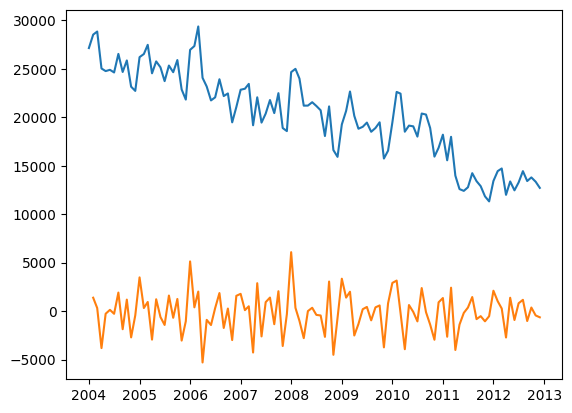

In [8]:
plt.plot(series)
plt.plot(series_1)

In [9]:
series_2 = series_1.diff().dropna()

In [10]:
perform_adf_test(series_2)

ADF Statistic: -7.162321
p-value: 0.000000


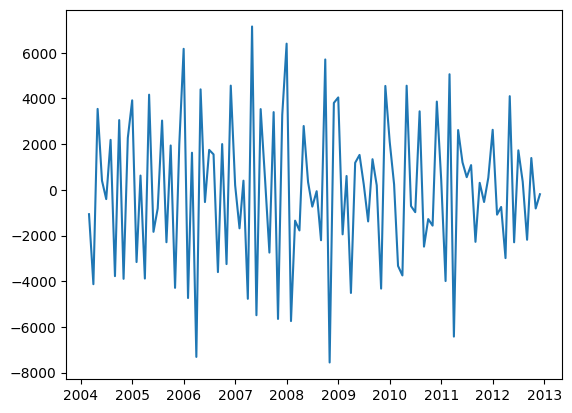

In [11]:
plt.plot(series_2)

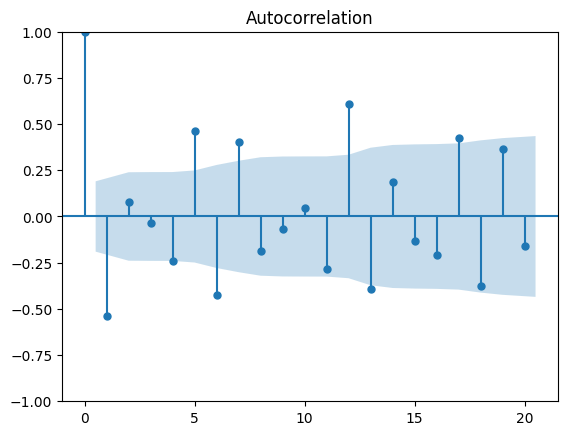

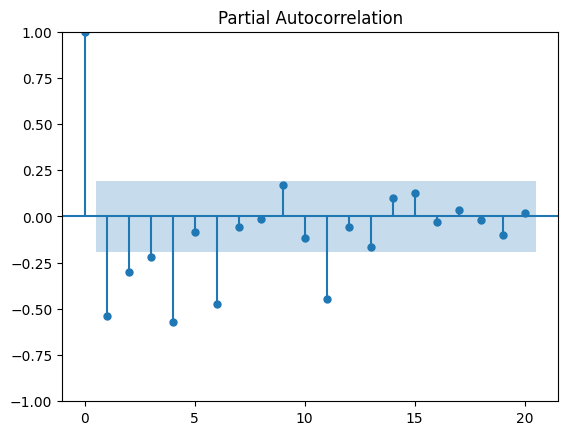

In [12]:
plot_acf(series_2, lags=20)
plot_pacf(series_2, lags=20)
plt.show()

In [13]:
ar_orders = [1, 2, 3]
ma_orders = [5, 6, 7]
fitted_model_dict = {}

for ar_order in ar_orders:
    for ma_order in ma_orders:
        # Create ARMA(p,q) model
        arma_model = ARIMA(series_2, order=(ar_order, 0, ma_order))
        arma_model_fit = arma_model.fit()
        fitted_model_dict[(ar_order, ma_order)] = arma_model_fit

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

p_values = range(1, 3)
q_values = range(1, 3)

fitted_model_dict = {}

for p, q in product(p_values, q_values):
    # Create ARMA(p,q) model
    arma_model = ARIMA(series_2, order=(p, 0, q))
    arma_model_fit = arma_model.fit()
    
    # Store AIC and BIC scores
    aic_score = arma_model_fit.aic
    bic_score = arma_model_fit.bic
    
    fitted_model_dict[(p, q)] = {'AIC': aic_score, 'BIC': bic_score}

# Print AIC and BIC scores for each combination


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
for (p, q), scores in fitted_model_dict.items():
    print(f'ARMA({p},{q}) - AIC: {scores["AIC"]}, BIC: {scores["BIC"]}')


ARMA(1,1) - AIC: 1925.1019195091226, BIC: 1935.7556758855708
ARMA(1,2) - AIC: 1929.6906021597774, BIC: 1943.0077976303378
ARMA(2,1) - AIC: 1924.1559573637303, BIC: 1937.4731528342907
ARMA(2,2) - AIC: 1921.7775315713016, BIC: 1937.7581661359739


In [16]:
train_end = datetime(2011,12,1)
test_end = datetime(2012,12,1)

train_data = series_2[:train_end]
test_data = series_2[train_end + timedelta(days=1):test_end]

In [17]:
model = ARIMA(train_data, order=(2,1,2))

In [18]:
model_fit = model.fit()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [19]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   94
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -864.804
Date:                Mon, 05 Aug 2024   AIC                           1739.608
Time:                        11:59:53   BIC                           1752.271
Sample:                    03-01-2004   HQIC                          1744.721
                         - 12-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3752      0.101    -13.656      0.000      -1.573      -1.178
ar.L2         -0.6232      0.095     -6.561      0.000      -0.809      -0.437
ma.L1         -0.1632      0.159     -1.025      0.3

In [20]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [21]:
pred_end_date

Timestamp('2012-12-01 00:00:00')

In [22]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

In [23]:
predictions

2012-01-01   -438.581231
2012-02-01    205.147118
2012-03-01    -77.746684
2012-04-01    -89.872824
2012-05-01    103.096447
2012-06-01   -154.715728
2012-07-01     79.569908
2012-08-01    -81.953570
2012-09-01     -5.830452
2012-10-01     -9.855930
2012-11-01    -51.758492
2012-12-01      8.373983
Freq: MS, Name: predicted_mean, dtype: float64

Text(0, 0.5, 'Sales')

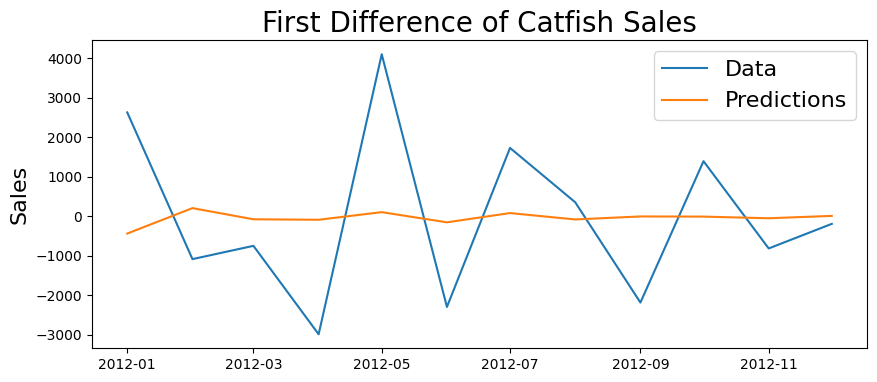

In [24]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)


In [25]:
def invert_diff(last_actual, differences):
    inverted_values = []
    last_observation = last_actual
    for diff in differences:
        inverted_value = last_observation + diff
        inverted_values.append(inverted_value)
        last_observation = inverted_value
    return inverted_values


In [26]:
actual_values = pd.Series([100, 105, 110, 115, 120])

# Sample differenced data (assuming first order differencing)
differenced_data = pd.Series([5, 5, 5, 5])

# Sample model forecast (assuming one-step-ahead forecast)


In [27]:
actual_values = pd.Series([100, 105, 110, 115, 120])
actual_values.iloc[-1]

np.int64(120)

In [28]:
invert_diff(actual_values.iloc[-1],differenced_data)

[np.int64(125), np.int64(130), np.int64(135), np.int64(140)]